#  Зависимые выборки 

В случае, когда выборки зависимы, мы должны использовать для проверки гипотез критерии, которые это учитывают.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels as sts 

plt.style.use('ggplot')
%matplotlib inline

# 1. Реклама

Фокус-группу из потенциальных покупателей спрашивают, купят ли они товар. После им показывают 30 секундный видео-ролик, в котором объясняется как этот товар поменяет их жизнь. Каждого из них снова спрашивают, купит ли он товар. Нужно проверить гипотезу о том, что ролик повлиял на мнение людей. 

В таблице ниже в столбик записаны результаты первого опроса, в строчку результаты второго. 

In [2]:
df = pd.DataFrame([[30, 15], [9,51]])
df.columns = ['yes', 'no']
df.index = ['yes', 'no']
df

,yes,no
yes,30,15
no,9,51


In [3]:
df2 = pd.DataFrame([['a', 'b'], ['c', 'd']])
df2.columns = ['yes', 'no']
df2.index = ['yes', 'no']
df2

,yes,no
yes,a,b
no,c,d


__Гипотеза:__ 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{Ролик никак не повиял на готовность купить товар} \\
&H_1: \hspace{2mm} p_1 \ne p_2  \hspace{2mm} \text{Есть различия}
\end{aligned}
$$

__Критерий:__

$$
Z = \frac{c - b}{\sqrt{c + b - \frac{(c-b)^2}{n}}}
$$

In [4]:
def proportions_diff_z_stat_rel(df):
    n = df.sum().sum()
    c = df.loc['no','yes']
    b = df.loc['yes','no']
    return (c - b) / np.sqrt(c + b - (c - b)**2 / n )

In [5]:
z_obs = proportions_diff_z_stat_rel(df)
z_obs

-1.2335879094879223

In [6]:
alpha = 0.05 
z_crit = stats.norm.ppf(alpha/2)   # критическое значение статистики

print(f'Наблюдаемое значение {z_obs:.3} больше критического {z_crit:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение -1.23 больше критического -1.96 => нулевая гипотеза не отвергается


# 2. Контрольная работа

В файле `cr.csv` лежат результеты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [7]:
df = pd.read_csv('cr.csv', sep='\t')
df.head()

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

Правда ли, что в среднем их успеваемость не изменилась?

In [8]:
d = df.k2.fillna(0) - df.k1.fillna(0)
d.size

389

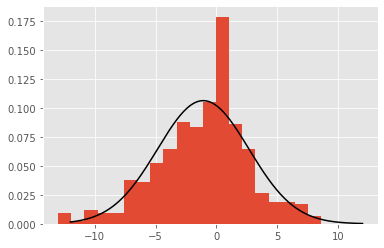

In [9]:
d_mean = d.mean()
d_std = d.std(ddof=1)

plt.hist(d, bins=20, density=True)

xs = np.linspace(-12, 12, 300)
ys = stats.norm(loc=d_mean, scale=d_std).pdf(xs)
plt.plot(xs, ys, color="black");

In [10]:
d_mean

-1.0817480719794341

Распределение разности оценок похоже на нормальное. Можем использовать тест Стьюдента.

In [11]:
# Тест для разностей
stats.ttest_1samp(d, 0)

Ttest_1sampResult(statistic=-5.678488097412358, pvalue=2.6673273264469826e-08)

In [12]:
# тест для зависимых выборок 
x = df.k2.fillna(0)
y = df.k1.fillna(0)

stats.ttest_rel(x, y)

Ttest_relResult(statistic=-5.678488097412358, pvalue=2.6673273264469826e-08)

Гипотеза о том, что успеваемость студентов не изменилась, отвергается. 